In [1]:
import pandas as pd
iris_df = pd.read_csv('./datasets/iris.csv')

In [2]:
iris_df.shape

(150, 6)

In [3]:
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris_df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


<Axes: >

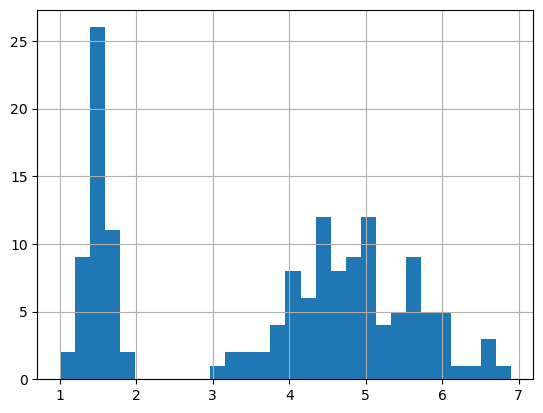

In [5]:
iris_df['PetalLengthCm'].hist(bins=30)

<Axes: title={'center': 'PetalLengthCm'}, xlabel='Species'>

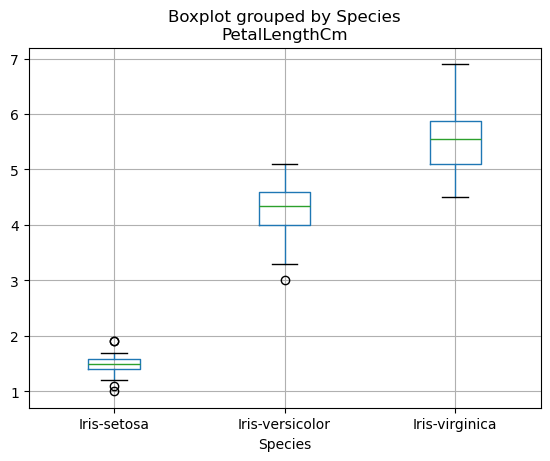

In [6]:
iris_df.boxplot(by='Species',column=['PetalLengthCm'])

In [7]:
"vérification existence valeurs manquantes" 
iris_df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
"préparation du modèle : séparation en X = variables explicatives et y = la variable cible (espèce d'iris)" 
y=iris_df['Species']
X=iris_df.drop(['Species'], axis=1)

In [9]:
"séparation des données en données d'entrainement et données de test"
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [10]:
"normalisation des données avec StandardScaler"
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
from sklearn.tree import DecisionTreeClassifier
"instanciation du model voulu"
tree = DecisionTreeClassifier(max_depth=2)
"entrainement"
tree.fit(X_train,y_train)
"predictions sur nouveau cas"
y_pred=tree.predict(X_test)

In [12]:
"évaluation de la qualité du modèle"
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [13]:
"matrice de confusion" 
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])